<a href="https://colab.research.google.com/github/Udaykiranrd/Deep-Learning/blob/main/Deep_learning_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Gudipally Uday Kiran Reddy

**Student Id:** 22WU0104043

Lab1:

30/12/2024

Implement a perceptron for binary classification (AND gate).

**Key Features:**

Includes a step_function for activation.

Implements a Perceptron class with methods for prediction and training.

Uses random initialization for weights and bias.

Trains the perceptron using sample data for an AND gate.

Outputs test predictions.


In [ ]:
import numpy as np

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=100):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # AND gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


Test the perceptron on a different dataset (OR gate).


**Key Features:**

Reuses the Perceptron class.


Trains and evaluates the perceptron on sample data for an OR gate.


Outputs predictions for each input.




In [ ]:
# Sample data for binary classification (OR gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # OR gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Train a perceptron on the Iris dataset.

**Key Features:**

Loads the Iris dataset and selects binary target labels.

Splits the dataset into training and testing sets.

Implements and trains a perceptron using custom logic.

Evaluates the perceptron and prints the accuracy.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Select features and labels
X = iris.data[:, (0, 1)]  # Sepal length, sepal width
y = (iris.target == 0).astype(int)  # Binary target: 1 if class 0, else 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0).astype(int)  # Ensure integer output

    def fit(self, X, y):
        n_features = X.shape[1]

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Iterate for the number of epochs
        for epoch in range(self.epochs):
            # Loop through the training set
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias  # Dot product for one sample
                y_pred = self.activation(z)  # Pass through activation function

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias  # Dot product for all samples
        return self.activation(z)

# Create a Perceptron instance
perceptron = Perceptron(learning_rate=0.001, epochs=100)

# Train the Perceptron
perceptron.fit(X_train, y_train)

# Make predictions
pred = perceptron.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


**Programming Assignment - 1**

**Step1:**

Select a Dataset:
Use a simple, publicly available dataset for binary classification (e.g., Titanic dataset with two
classes, or a custom dataset where the target is binary).
Load the Titanic dataset.



**Key Features:**

Loads the dataset from a GitHub URL.

Displays the first five rows of the dataset.

Provides information about dataset columns and types.

In [ ]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())  # Display the first 5 rows of the dataset
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Step2:**

Install necessary libraries (e.g., NumPy, pandas, Matplotlib, Scikit-learn).

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Step3:**

Preprocess the Titanic dataset.


**Key Features:**

Retains relevant columns (Pclass, Sex, Age, Fare, Survived).

Handles missing values in the Age column by filling with the mean.

Converts the categorical Sex column to numerical format.

Splits data into features (X) and target (y) for training and testing.

In [ ]:
# Preprocessing: Keep relevant columns and create a copy
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step4:**

Use the step activation function to implement the perceptron model.

**Key Features:**

Implements the perceptron with custom training logic.

Uses the Titanic dataset for binary classification.

In [ ]:
# Step activation function
def step_function(z):
    return np.where(z > 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error_count = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                prediction = step_function(z)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    error_count += 1
            self.errors.append(error_count)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return step_function(z)

# Initialize and train the perceptron
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred_manual = model.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_manual))


Perceptron Accuracy: 0.7877094972067039


**Step5:**

Implement the perceptron from scratch and  using a framework (e.g., Scikit-learn).

In [ ]:
# Preprocessing: Keep relevant columns and handle missing values
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Fill missing values for 'Age' and 'Fare'
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values in training and testing sets
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Train the Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
from sklearn.metrics import accuracy_score
y_pred_sklearn = clf.predict(X_test)
print("Scikit-Learn Perceptron Accuracy:", accuracy_score(y_test, y_pred_sklearn))


Scikit-Learn Perceptron Accuracy: 0.6536312849162011


**Step6:**

To track the progress of the Perceptron model during training, we can visualize how the total number of errors reduces with each iteration:

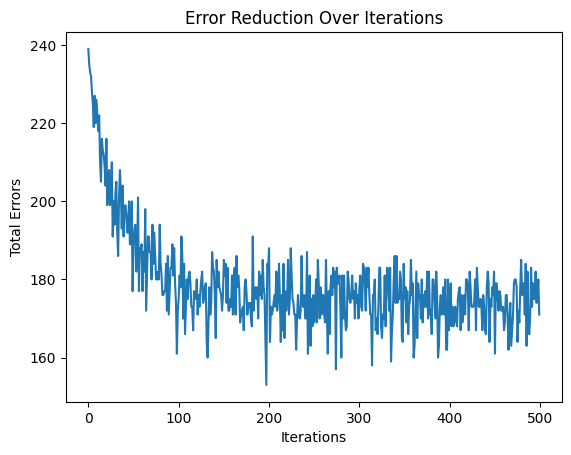

In [ ]:
# Visualize the training errors
plt.plot(range(len(perceptron.errors)), perceptron.errors)
plt.xlabel("Iterations")
plt.ylabel("Total Errors")
plt.title("Error Reduction Over Iterations")
plt.show()

**Limitations of the Perceptron**
1.	**Inability to Handle Non-Linearly Separable Data:**

  The Perceptron fails if the data is not linearly separable and cannot converge to a solution. For example, it cannot solve the XOR problem.
2.	**No Probabilistic Output:**
  
  The Perceptron provides only binary outputs (0 or 1) and does not give the probability of belonging to a class.
3.	**Sensitive to Learning Rate:**
  
  A poorly chosen learning rate η can lead to slow convergence or divergence.
4.	**Single-Layer Architecture:**
  
  The basic Perceptron cannot handle more complex problems involving multiple layers.



**Observations**

**Good Performance for Logical Models:**

  1)Predicted labels align with expectations for logic gates (AND/OR).
  
  2)Accuracy metrics reflect strong model training on simple logic datasets.
  
**Challenges with Missing Data:**

  1)Titanic dataset has significant missing values in Age and Cabin.

  2)Addressing these gaps is critical for downstream analysis.

**Perceptron Model Accuracy:**

 1)Accuracy differences between manual and Scikit-Learn implementations, Potential variations in hyperparameter settings or convergence criteria.
  
  2) Highlights the need for parameter tuning in pre-built models.

**Imbalance in Accuracy:**

  1)Logical problems yielded very high accuracy.

  2)Perceptron results for more complex datasets underperformed, indicating possible overfitting or poor generalization.

**Visualization Insights:**

  1)Plots might demonstrate decision boundaries or distribution of features.

**Programming Assignment - 2**

Solve a multi-class classification using single layer perceptron.


**Single perceptron**

**Dataset:** Breast Cancer Dataset

**Step1:**

Install necessary libraries (e.g., NumPy, pandas, Matplotlib, Scikit-learn).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Step 2:**

Load and preprocess the dataset

In [ ]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Select only two features for visualization purposes
X = X[:, :2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3:**

Train a single perceptron

In [ ]:
#Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 50

# Perceptron training loop
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        # Compute activation
        activation = np.dot(weights, X_train[i]) + bias
        prediction = 1 if activation >= 0 else 0

        # Update weights if misclassified
        if prediction != y_train[i]:
            weights += learning_rate * (y_train[i] - prediction) * X_train[i]
            bias += learning_rate * (y_train[i] - prediction)


**Step 4:**

Evaluate the perceptron

In [ ]:
# Prediction function
def predict(X):
    return [1 if np.dot(weights, x) + bias >= 0 else 0 for x in X]

# Predict on test set
y_pred = predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.78


**Step 5:**

Visualize the decision boundary

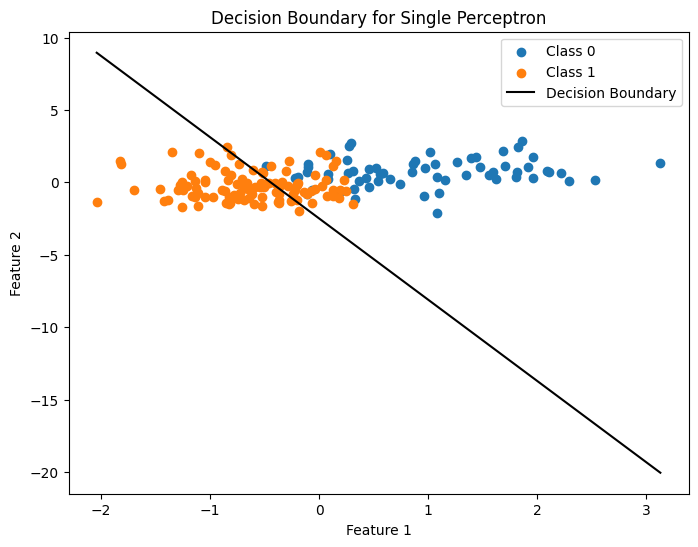

In [ ]:
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8, 6))

    # Scatter plot of data points
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}")

    # Decision boundary
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, label="Decision Boundary", color="black")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary for Single Perceptron")
    plt.legend()
    plt.show()

plot_decision_boundary(X_test, y_test, weights, bias)


**Single layer perceptron**
(multi-class classification)



**Step1:**

Install necessary libraries

In [ ]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

**Step 2:**

Load and preprocess the dataset

**Dataset:** Digits data

In [ ]:
# Load Digits dataset
digits_data = load_digits()
X, y = digits_data.data, digits_data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3:**

Train a single-layer perceptron using One-vs-All

In [ ]:
num_classes = len(np.unique(y))
num_features = X_train.shape[1]
weights = np.zeros((num_classes, num_features))
biases = np.zeros(num_classes)

# Training loop
for cls in range(num_classes):
    binary_labels = np.where(y_train == cls, 1, -1)  # Convert to binary for this class
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            activation = np.dot(weights[cls], X_train[i]) + biases[cls]
            prediction = 1 if activation >= 0 else -1
            if prediction != binary_labels[i]:
                weights[cls] += learning_rate * binary_labels[i] * X_train[i]
                biases[cls] += learning_rate * binary_labels[i]

**Step 4:**

Predict on the test set

In [ ]:
def predict_multiclass(X):
    activations = np.dot(weights, X.T) + biases[:, np.newaxis]
    return np.argmax(activations, axis=0)

y_pred = predict_multiclass(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.94


**Lab 2:**

**(24/01/2025)**

**Experiment 3**

Multi-Layer Perceptron (MLP) for XOR Gate

**Step 1:**

Import Libraries

In [ ]:
import numpy as np

**Step 2:**

Define XOR Data

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

**Step 3:**

Define Sigmoid and Its Derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Step 4:**

Initialize Weights and Biases

In [ ]:
np.random.seed(0)
weights_input_hidden = np.random.uniform(size=(2, 2))
weights_hidden_output = np.random.uniform(size=(2, 1))
bias_hidden = np.random.uniform(size=(1, 2))
bias_output = np.random.uniform(size=(1, 1))
learning_rate = 0.1

**Step 5:**

Train the Model

In [ ]:
for epoch in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += np.dot(hidden_layer_output.T, output_delta) * learning_rate
    weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

**Step 6:**

Display Results

In [ ]:
print("Final output after training:")
print(output_layer_output)

Final output after training:
[[0.06256664]
 [0.94187413]
 [0.94184757]
 [0.06309644]]


**Experiment 4**

Activation Functions

**Step 1:**

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Step 2:**

Define Activation Functions

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

**Step 3:**

Generate Data

In [ ]:
x = np.linspace(-10, 10, 100)

**Step 4:**

Apply Activation Functions

In [ ]:
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

**Step 5:**

Plot the Outputs

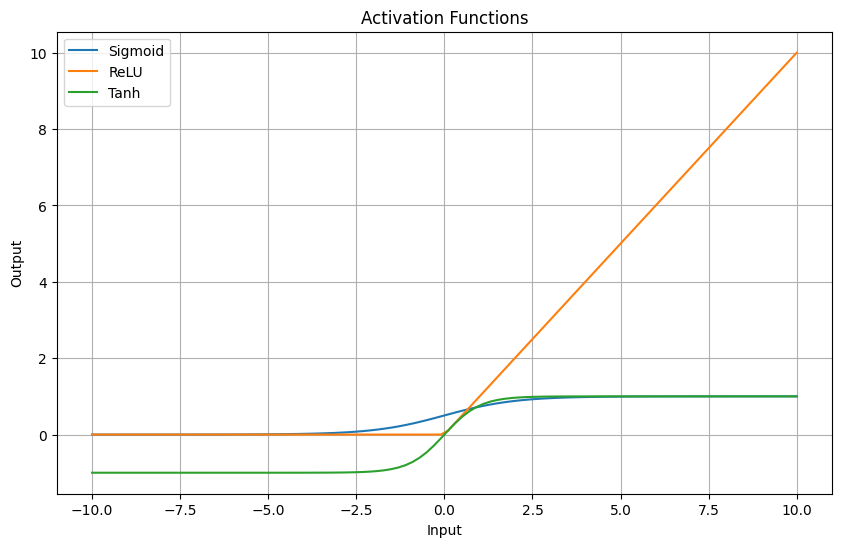

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label="Sigmoid")
plt.plot(x, y_relu, label="ReLU")
plt.plot(x, y_tanh, label="Tanh")
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()

**Experiment 5:**

Forward and Backpropagation

**Step 1:**

Import Libraries

In [ ]:
import numpy as np

**Step 2:**

Define Data

In [ ]:
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

**Step 3:**

Initialize Weights and Biases

In [ ]:
np.random.seed(42)
weights_1 = np.random.rand(2, 2)
weights_2 = np.random.rand(2, 1)
bias_1 = np.random.rand(1, 2)
bias_2 = np.random.rand(1, 1)
learning_rate = 0.1

**Step 4:**

Define Sigmoid and Its Derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Step 5:**

Train the Model

In [ ]:
for epoch in range(10000):
    # Forward propagation
    z1 = np.dot(X, weights_1) + bias_1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights_2) + bias_2
    a2 = sigmoid(z2)

    # Backpropagation
    error = y - a2
    d_a2 = error * sigmoid_derivative(a2)
    d_a1 = np.dot(d_a2, weights_2.T) * sigmoid_derivative(a1)

    # Update weights and biases
    weights_2 += np.dot(a1.T, d_a2) * learning_rate
    bias_2 += np.sum(d_a2, axis=0, keepdims=True) * learning_rate
    weights_1 += np.dot(X.T, d_a1) * learning_rate
    bias_1 += np.sum(d_a1, axis=0, keepdims=True) * learning_rate

**Step 6:**

Display Results

In [ ]:
print("Final Output:")
print(a2)

Final Output:
[[0.944367  ]
 [0.94447222]
 [0.05997169]
 [0.06029012]]


**lab3**

27/01/2025

**1) Baseline Model**

**Step1:**

Import Libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

**Step2:**

Load the Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Step3:**

Preprocess the Data

Normalize pixel values to a range of 0 to 1:

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Convert labels to one-hot encoding:

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Step4:**

Build the Model

In [6]:
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step5:**

Compile the Model

In [7]:
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

**Step6:**

Train the Model

In [8]:
baseline_model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   epochs=10,
                   batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8603 - loss: 0.5010 - val_accuracy: 0.9531 - val_loss: 0.1574
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9588 - loss: 0.1422 - val_accuracy: 0.9683 - val_loss: 0.1085
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9732 - loss: 0.0968 - val_accuracy: 0.9714 - val_loss: 0.0935
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9797 - loss: 0.0704 - val_accuracy: 0.9725 - val_loss: 0.0885
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9839 - loss: 0.0556 - val_accuracy: 0.9749 - val_loss: 0.0809
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9738 - val_loss: 0.0869
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9774 - val_loss: 0.0722
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9916 - loss: 0.0294 - val_accuracy: 0.

**Step7:**

Evaluate the Model

In [9]:
baseline_results = baseline_model.evaluate(x_test, y_test)
print("Baseline Test Accuracy:", baseline_results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0904
Baseline Test Accuracy: 0.978600025177002


**2) L1 and L2 Regularization**

**Step1:**

L1 Regularization

Build a model with L1 regularization:

In [10]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(10, activation='softmax')
])

Compile the model:

In [11]:
l1_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

Train the model:

In [12]:
l1_history = l1_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10,
                          batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7288 - loss: 7.2211 - val_accuracy: 0.8512 - val_loss: 1.2295
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8438 - loss: 1.2227 - val_accuracy: 0.8651 - val_loss: 1.0841
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8551 - loss: 1.1006 - val_accuracy: 0.8667 - val_loss: 1.0140
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8637 - loss: 1.0282 - val_accuracy: 0.8712 - val_loss: 0.9663
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8676 - loss: 0.9885 - val_accuracy: 0.8731 - val_loss: 0.9421
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8715 - loss: 0.9525 - val_accuracy: 0.8761 - val_loss: 0.9338
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8713 - loss: 0.9431 - val_accuracy: 0.8868 - val_loss: 0.8797
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8778 - loss: 0.9068 - val_accuracy: 0.

**Step2:**

L2 Regularization:

In [13]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

Compile the model:

In [14]:
l2_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

Train the model:

In [15]:
l2_history = l2_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10,
                          batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8468 - loss: 1.1588 - val_accuracy: 0.9225 - val_loss: 0.4276
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9237 - loss: 0.4157 - val_accuracy: 0.9402 - val_loss: 0.3545
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9348 - loss: 0.3624 - val_accuracy: 0.9425 - val_loss: 0.3190
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9427 - loss: 0.3301 - val_accuracy: 0.9485 - val_loss: 0.2981
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9492 - loss: 0.3034 - val_accuracy: 0.9575 - val_loss: 0.2811
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9504 - loss: 0.2933 - val_accuracy: 0.9509 - val_loss: 0.2813
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9528 - loss: 0.2810 - val_accuracy: 0.9548 - val_loss: 0.2674
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9536 - loss: 0.2714 - val_accuracy: 0.

**Step3:**

Combined L1 and L2 Regularization:

In [16]:
from tensorflow.keras.regularizers import l1_l2

l1_l2_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(10, activation='softmax')
])

Compile the model:

In [17]:
l1_l2_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

Train the model:

In [18]:
l1_l2_history = l1_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10,
                          batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8792 - loss: 0.8748 - val_accuracy: 0.8880 - val_loss: 0.8270
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8780 - loss: 0.8685 - val_accuracy: 0.8893 - val_loss: 0.8216
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8849 - loss: 0.8423 - val_accuracy: 0.8878 - val_loss: 0.8288
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8839 - loss: 0.8487 - val_accuracy: 0.8904 - val_loss: 0.8303
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8888 - loss: 0.8311 - val_accuracy: 0.8910 - val_loss: 0.8396
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8862 - loss: 0.8351 - val_accuracy: 0.8997 - val_loss: 0.7870
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8859 - loss: 0.8298 - val_accuracy: 0.8965 - val_loss: 0.7922
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8842 - loss: 0.8326 - val_accuracy: 0.

**3) Dropout**

**Step1:**

Add Dropout Layers

Define a model with dropout:

In [19]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout rate is 50%
    Dense(10, activation='softmax')
])

**Step2:**

Compile the Model

In [20]:
dropout_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

**Step3:**

Train the Model

In [21]:
dropout_history = dropout_model.fit(x_train, y_train,
                                    validation_data=(x_test, y_test),
                                    epochs=10,
                                    batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7953 - loss: 0.6775 - val_accuracy: 0.9409 - val_loss: 0.1930
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9261 - loss: 0.2578 - val_accuracy: 0.9598 - val_loss: 0.1375
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9391 - loss: 0.2034 - val_accuracy: 0.9652 - val_loss: 0.1167
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9458 - loss: 0.1785 - val_accuracy: 0.9661 - val_loss: 0.1113
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9527 - loss: 0.1554 - val_accuracy: 0.9707 - val_loss: 0.0973
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9554 - loss: 0.1492 - val_accuracy: 0.9719 - val_loss: 0.0963
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9596 - loss: 0.1341 - val_accuracy: 0.9730 - val_loss: 0.0913
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9614 - loss: 0.1253 - val_accuracy: 0.

**4) Early Stopping**

**Step1:**

Define Early Stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01)

**Step2:**

Build and Compile a Model

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 classes
])
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


**Step3:**

Train with Early Stopping

In [24]:
early_history = baseline_model.fit(x_train, y_train,
                                   validation_data=(x_test, y_test),
                                   epochs=50,
                                   batch_size=64,
                                   callbacks=[early_stopping])


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8576 - loss: 0.5118 - val_accuracy: 0.9514 - val_loss: 0.1668
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9576 - loss: 0.1516 - val_accuracy: 0.9667 - val_loss: 0.1128
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9726 - loss: 0.0983 - val_accuracy: 0.9716 - val_loss: 0.0961
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9790 - loss: 0.0743 - val_accuracy: 0.9719 - val_loss: 0.0926
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9822 - loss: 0.0593 - val_accuracy: 0.9744 - val_loss: 0.0798
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9781 - val_loss: 0.0715
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9893 - loss: 0.0369 - val_accuracy: 0.9767 - val_loss: 0.0749
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0291 - val_accuracy: 0.

**5) Data Augmentation**

**Step1:**

Create Data Augmentation Generator

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

**Step2:**

Fit Data Generator

In [26]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
datagen.fit(x_train)

**Step3:**

Train Model with Augmented Data

In [27]:
aug_history = baseline_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                                 validation_data=(x_test, y_test),
                                 epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8718 - loss: 0.4691 - val_accuracy: 0.9747 - val_loss: 0.0870
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9355 - loss: 0.2179 - val_accuracy: 0.9724 - val_loss: 0.0893
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9470 - loss: 0.1783 - val_accuracy: 0.9744 - val_loss: 0.0818
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9507 - loss: 0.1627 - val_accuracy: 0.9768 - val_loss: 0.0709
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9562 - loss: 0.1483 - val_accuracy: 0.9757 - val_loss: 0.0727
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9555 - loss: 0.1527 - val_accuracy: 0.9744 - val_loss: 0.0771
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9599 - loss: 0.1343 - val_accuracy: 0.9791 - val_loss: 0.0669
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9619 - loss: 0.1275 - val_accurac

**6) Combined Regularization**

**Step1:**

Build a Model with Multiple Regularizations

In [28]:
combined_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

**Step2:**

Compile and Train

In [29]:
combined_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

combined_history = combined_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                                      validation_data=(x_test, y_test),
                                      epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.5676 - loss: 2.0096 - val_accuracy: 0.9079 - val_loss: 0.6680
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7571 - loss: 1.0464 - val_accuracy: 0.9310 - val_loss: 0.5758
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7843 - loss: 0.9584 - val_accuracy: 0.9306 - val_loss: 0.5440
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7969 - loss: 0.9090 - val_accuracy: 0.9404 - val_loss: 0.5016
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8033 - loss: 0.8771 - val_accuracy: 0.9468 - val_loss: 0.4746
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8120 - loss: 0.8513 - val_accuracy: 0.9413 - val_loss: 0.4842
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8128 - loss: 0.8376 - val_accuracy: 0.9478 - val_loss: 0.4479
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8144 - loss: 0.8291 - 

**Lab4**

**04/02/2025**

**Step 1:** Import Required Libraries

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

**Step 2:** Load and Preprocess the Dataset

In [32]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels (for multi-class classification)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Step 3:** Build a Neural Network Without Regularization

In [33]:
# Define a simple feedforward neural network (Baseline Model)
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 2D image to 1D array
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(x_train, y_train,
                                      validation_data=(x_test, y_test),
                                      epochs=10,
                                      batch_size=64)

# Evaluate baseline model
baseline_results = baseline_model.evaluate(x_test, y_test)
print("Baseline Model Test Accuracy:", baseline_results[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8577 - loss: 0.5060 - val_accuracy: 0.9496 - val_loss: 0.1693
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9565 - loss: 0.1507 - val_accuracy: 0.9628 - val_loss: 0.1175
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9707 - loss: 0.1004 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9785 - loss: 0.0755 - val_accuracy: 0.9758 - val_loss: 0.0787
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9836 - loss: 0.0561 - val_accuracy: 0.9746 - val_loss: 0.0809
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9793 - val_loss: 0.0705
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9905 - loss: 0.0356 - val_accuracy: 0.9749 - val_loss: 0.0799
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0284 - val_accurac

**Step 4:** Build a Neural Network With Regularization

**(A)** L1 Regularization

In [34]:
l1_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # Apply L1 Regularization
    Dense(10, activation='softmax')
])

l1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

l1_history = l1_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10,
                          batch_size=64)

print("L1 Regularized Model Accuracy:", l1_model.evaluate(x_test, y_test)[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7379 - loss: 7.2314 - val_accuracy: 0.8520 - val_loss: 1.2222
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8474 - loss: 1.2034 - val_accuracy: 0.8632 - val_loss: 1.0805
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8538 - loss: 1.0929 - val_accuracy: 0.8630 - val_loss: 1.0319
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8651 - loss: 1.0232 - val_accuracy: 0.8601 - val_loss: 1.0263
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8672 - loss: 0.9843 - val_accuracy: 0.8651 - val_loss: 0.9453
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8705 - loss: 0.9534 - val_accuracy: 0.8774 - val_loss: 0.9168
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8702 - loss: 0.9351 - val_accuracy: 0.8758 - val_loss: 0.9105
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8742 - loss: 0.9090 - val_accuracy: 0

**(B)** L2 Regularization

In [35]:
l2_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Apply L2 Regularization
    Dense(10, activation='softmax')
])

l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

l2_history = l2_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10,
                          batch_size=64)

print("L2 Regularized Model Accuracy:", l2_model.evaluate(x_test, y_test)[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8432 - loss: 1.1484 - val_accuracy: 0.9200 - val_loss: 0.4330
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9236 - loss: 0.4176 - val_accuracy: 0.9385 - val_loss: 0.3547
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9382 - loss: 0.3583 - val_accuracy: 0.9424 - val_loss: 0.3303
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9440 - loss: 0.3279 - val_accuracy: 0.9452 - val_loss: 0.3200
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9451 - loss: 0.3175 - val_accuracy: 0.9529 - val_loss: 0.2833
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9488 - loss: 0.2949 - val_accuracy: 0.9529 - val_loss: 0.2837
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9521 - loss: 0.2873 - val_accuracy: 0.9528 - val_loss: 0.2726
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9544 - loss: 0.2737 - val_accuracy: 0

**(C)** Dropout Regularization

In [36]:
dropout_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dropout_history = dropout_model.fit(x_train, y_train,
                                    validation_data=(x_test, y_test),
                                    epochs=10,
                                    batch_size=64)

print("Dropout Regularized Model Accuracy:", dropout_model.evaluate(x_test, y_test)[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7908 - loss: 0.6934 - val_accuracy: 0.9464 - val_loss: 0.1866
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9263 - loss: 0.2487 - val_accuracy: 0.9594 - val_loss: 0.1391
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9417 - loss: 0.1972 - val_accuracy: 0.9653 - val_loss: 0.1145
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9476 - loss: 0.1740 - val_accuracy: 0.9677 - val_loss: 0.1060
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9539 - loss: 0.1572 - val_accuracy: 0.9713 - val_loss: 0.0954
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9583 - loss: 0.1414 - val_accuracy: 0.9727 - val_loss: 0.0909
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9595 - loss: 0.1311 - val_accuracy: 0.9730 - val_loss: 0.0868
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9616 - loss: 0.1292 - val_accuracy: 0.

**(D)** Combined L1 + L2 Regularization

In [37]:
l1_l2_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),  # Combine L1 and L2
    Dense(10, activation='softmax')
])

l1_l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

l1_l2_history = l1_l2_model.fit(x_train, y_train,
                                validation_data=(x_test, y_test),
                                epochs=10,
                                batch_size=64)

print("L1 + L2 Regularized Model Accuracy:", l1_l2_model.evaluate(x_test, y_test)[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7411 - loss: 7.4441 - val_accuracy: 0.8555 - val_loss: 1.2683
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8496 - loss: 1.2357 - val_accuracy: 0.8659 - val_loss: 1.1104
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8577 - loss: 1.1142 - val_accuracy: 0.8747 - val_loss: 1.0372
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8651 - loss: 1.0416 - val_accuracy: 0.8774 - val_loss: 0.9786
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8666 - loss: 1.0029 - val_accuracy: 0.8652 - val_loss: 0.9742
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8723 - loss: 0.9661 - val_accuracy: 0.8769 - val_loss: 0.9334
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8742 - loss: 0.9421 - val_accuracy: 0.8850 - val_loss: 0.8976
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8770 - loss: 0.9208 - val_accuracy: 0.

**Step 5:** Plot Accuracy and Loss for Comparison

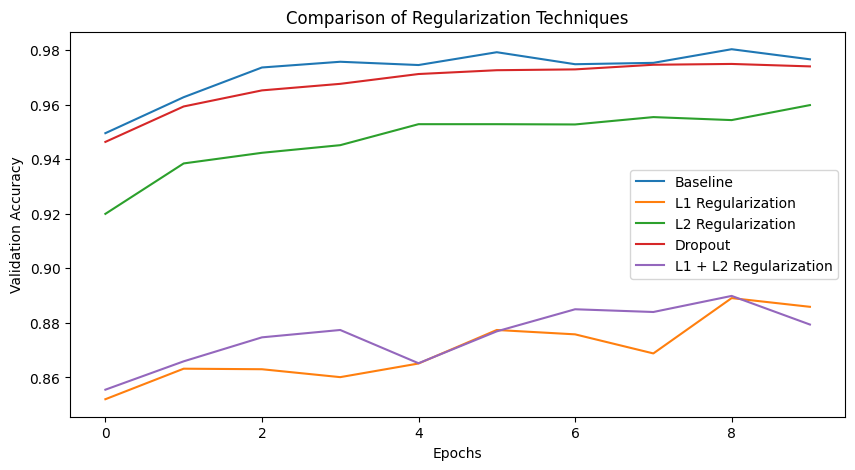

In [38]:
def plot_history(histories, title):
    plt.figure(figsize=(10,5))

    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=name)

    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

# Collect model histories
histories = {
    "Baseline": baseline_history,
    "L1 Regularization": l1_history,
    "L2 Regularization": l2_history,
    "Dropout": dropout_history,
    "L1 + L2 Regularization": l1_l2_history
}

plot_history(histories, "Comparison of Regularization Techniques")